In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv('/kaggle/input/customer-segmentation/Test.csv')
dataset.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [3]:
dataset.shape

(2627, 11)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [5]:
dataset.drop(columns=["ID"], inplace=True)

In [6]:
dataset.describe() 

,Age,Work_Experience,Family_Size
count,2627.000000,2358.000000,2514.000000
mean,43.649791,2.552587,2.825378
std,16.967015,3.341094,1.551906
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [7]:
dataset.describe(include=['O']) 

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,2627,2577,2603,2589,2627,2595,2627
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,A
freq,1424,1520,1602,802,1616,1672,846


/tmp/ipykernel_20/4278251324.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


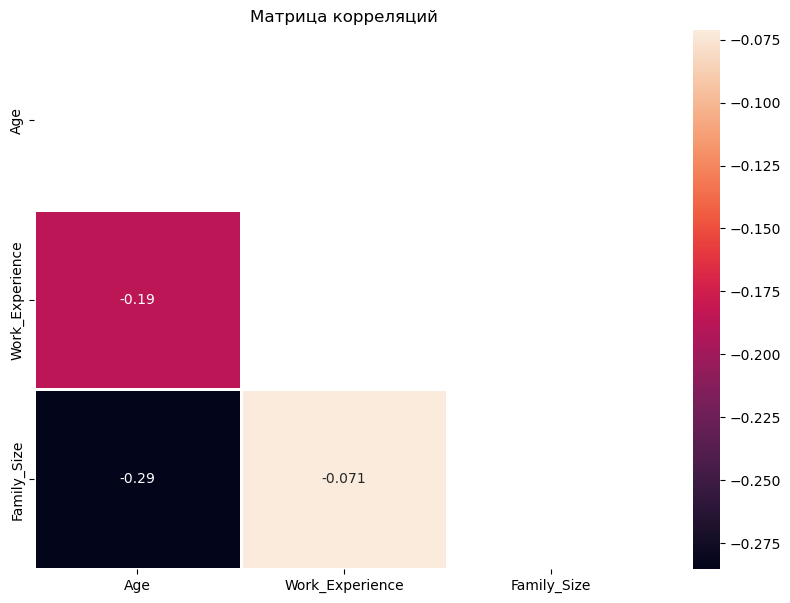

In [8]:
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,7))
plt.title('Матрица корреляций')
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g', linewidths=2);

Высокоррелированных признаков нет

In [9]:
dataset.isna().sum()

Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

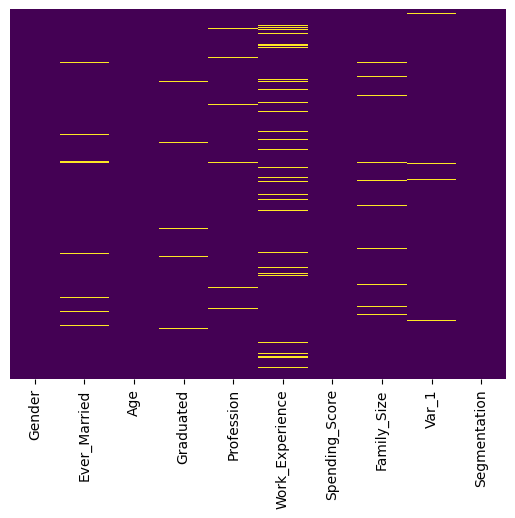

In [10]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis'); #визуализация пропусков

In [11]:
len(dataset)-len(dataset.drop_duplicates())

22

In [12]:
dataset.drop_duplicates(inplace=True)
len(dataset)-len(dataset.drop_duplicates())

0

In [13]:
dataset.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [14]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, int(training_set.max()) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

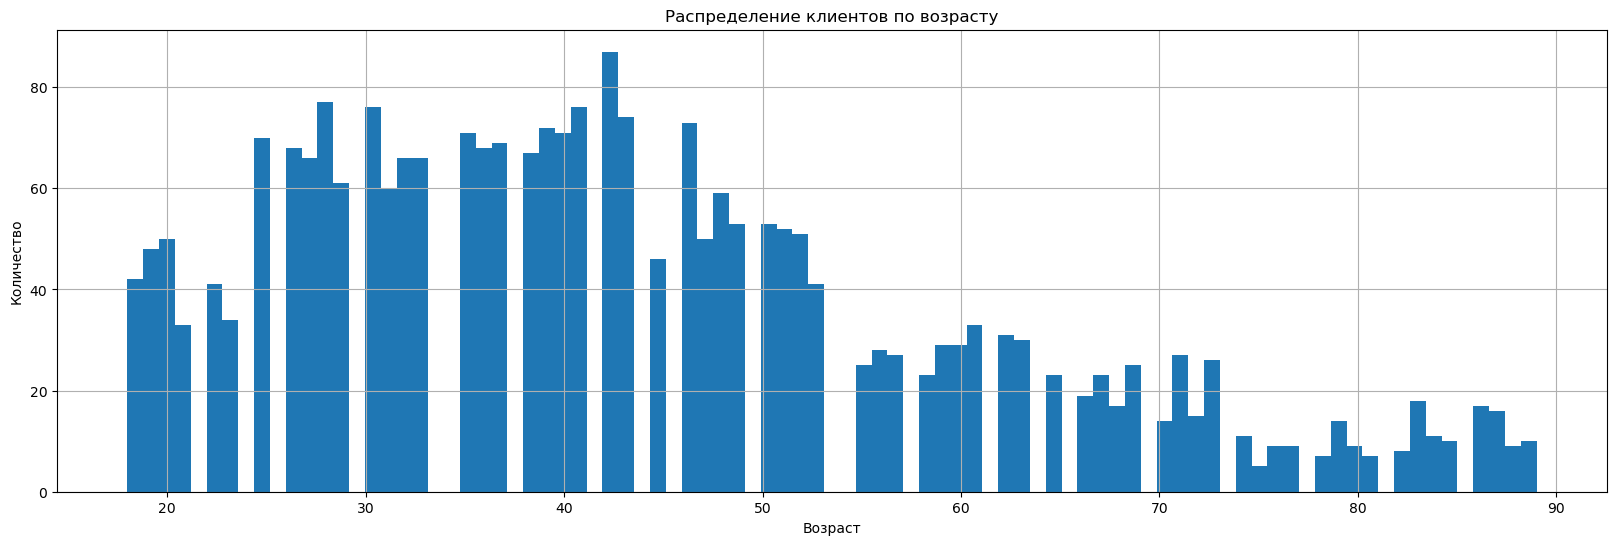

In [15]:
custom_hist(dataset["Age"], 'Распределение клиентов по возрасту', 'Возраст')

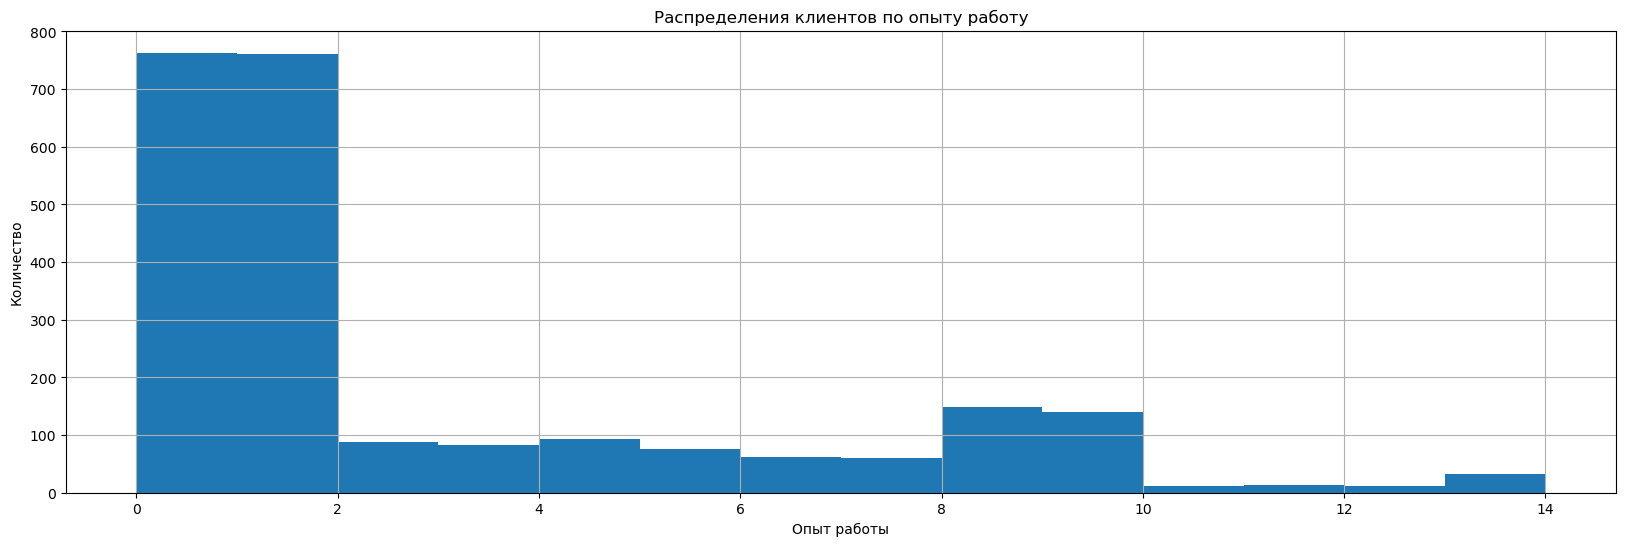

In [16]:
custom_hist(dataset["Work_Experience"], 'Распределения клиентов по опыту работу', 'Опыт работы')

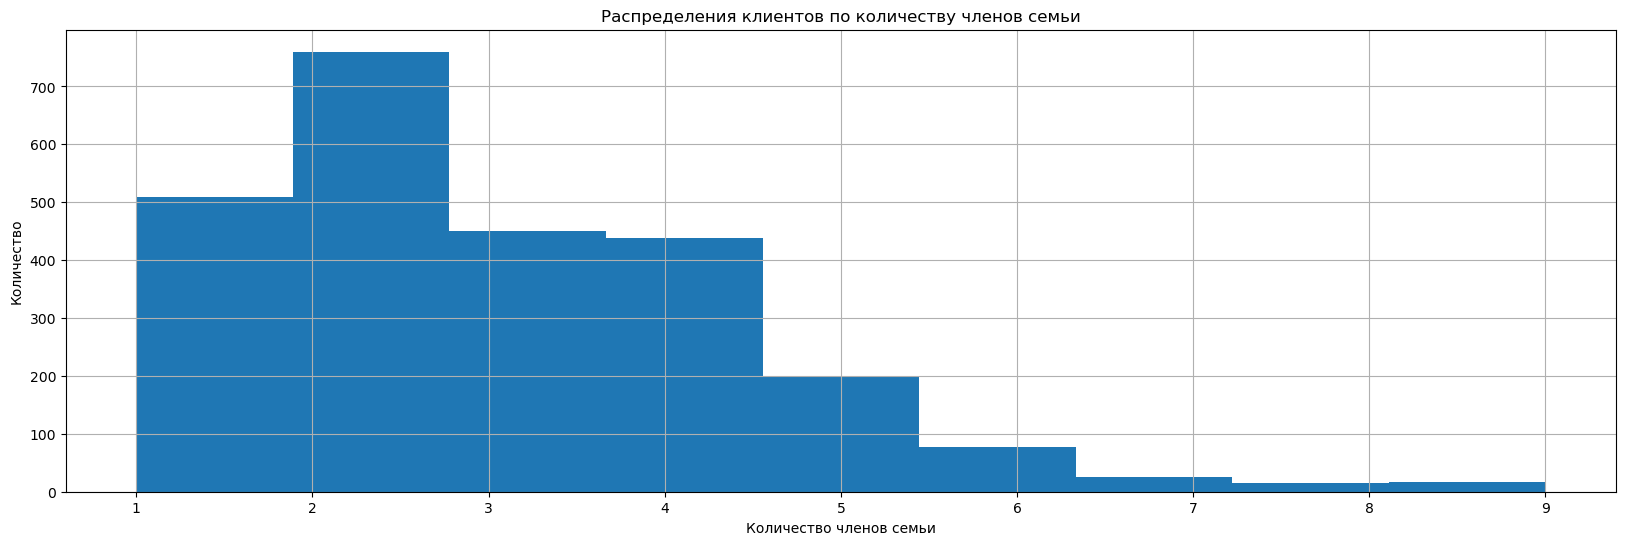

In [17]:
custom_hist(dataset["Family_Size"], 'Распределения клиентов по количеству членов семьи', 'Количество членов семьи')

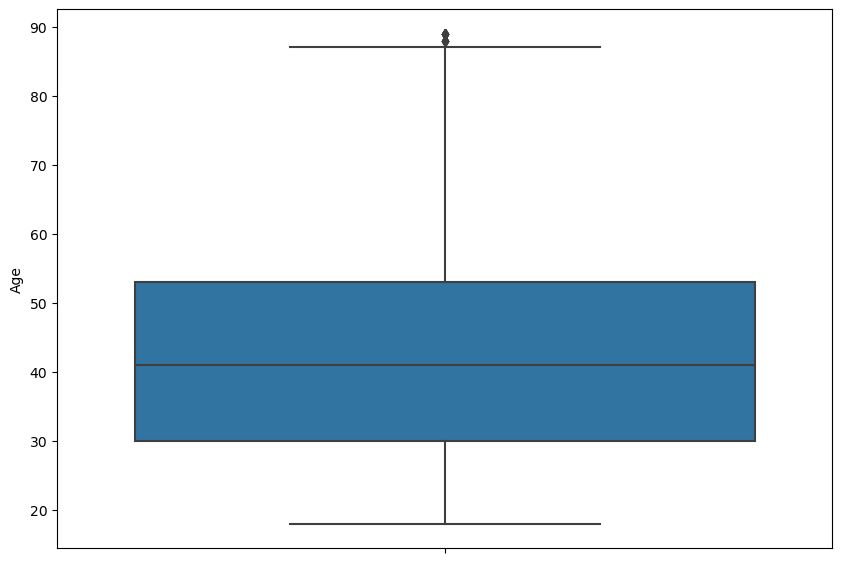

In [18]:
plt.figure(figsize = (10,7))
sns.boxplot(y=dataset['Age']);

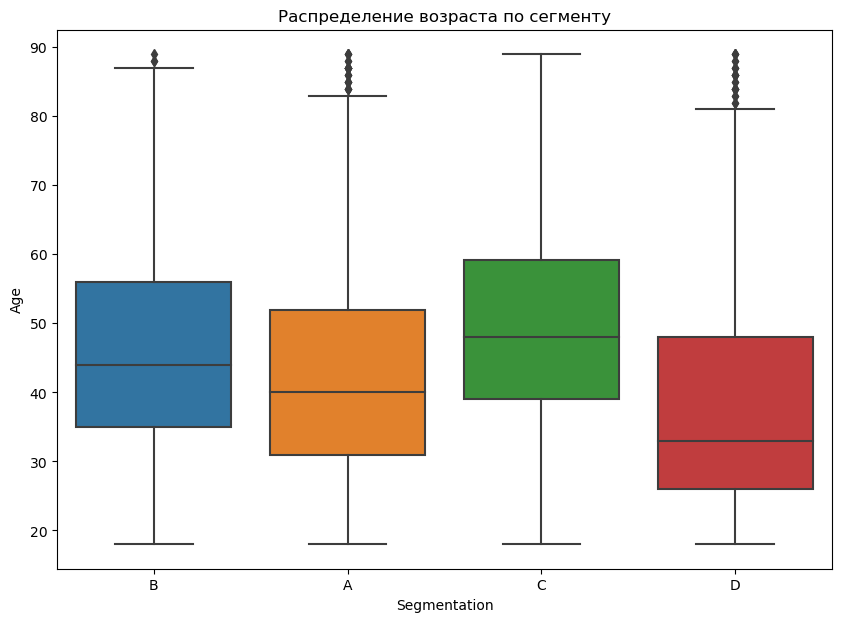

In [19]:
plt.figure(figsize = (10,7))
sns.boxplot(x='Segmentation', y='Age', data=dataset)
plt.title("Распределение возраста по сегменту")
plt.show()

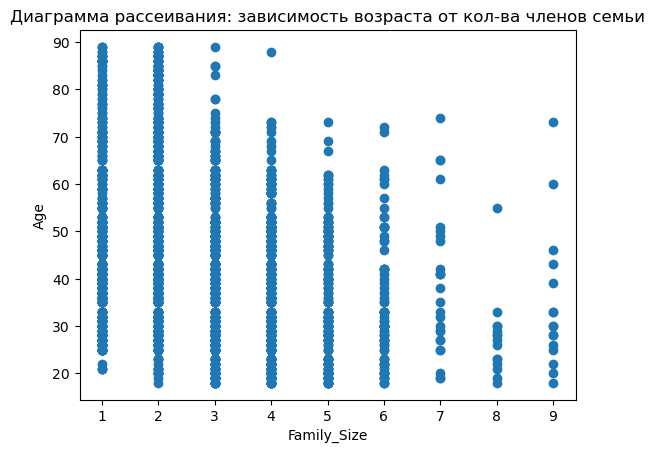

In [20]:
plt.scatter(dataset['Family_Size'], dataset['Age'])
plt.xlabel('Family_Size')
plt.ylabel('Age')
plt.title('Диаграмма рассеивания: зависимость возраста от кол-ва членов семьи')
plt.show()

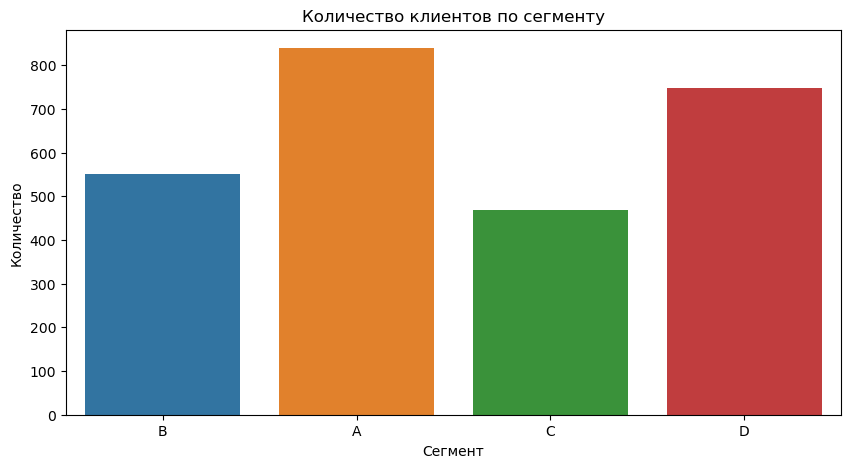

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='Segmentation', data=dataset)
plt.xlabel('Сегмент')
plt.ylabel('Количество')
plt.title('Количество клиентов по сегменту')
plt.show()

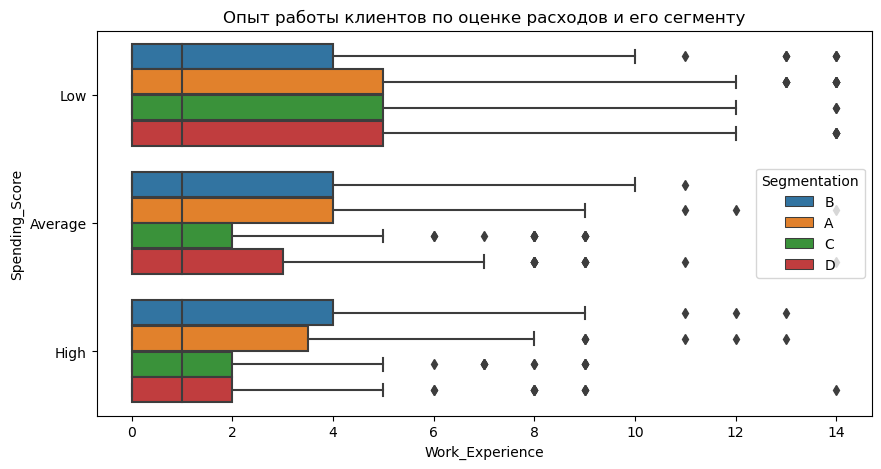

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Work_Experience', y='Spending_Score', hue='Segmentation', data=dataset)
plt.title("Опыт работы клиентов по оценке расходов и его сегменту")
plt.show()

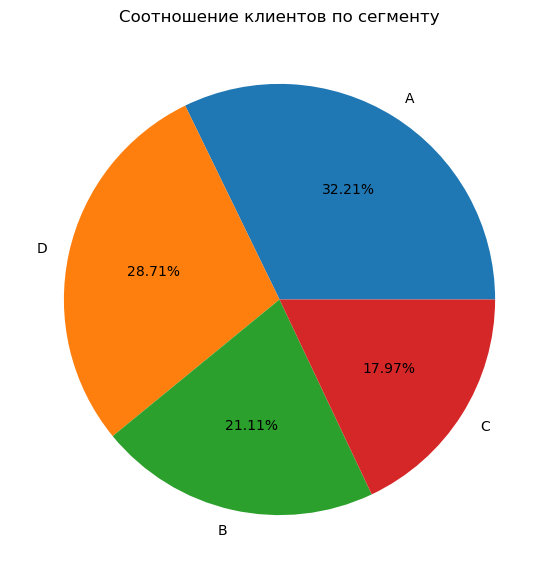

In [23]:
dataset["Segmentation"].value_counts().plot(
                 kind='pie',
                 title='Соотношение клиентов по сегменту',
                 figsize=(7, 7),
                 autopct='%.2f%%')
plt.ylabel('');